In [1]:
from Models_Util import *

## Reading the input

In [2]:
math_problems = pd.read_csv("../Data/final_data.csv", index_col=0)
math_problems.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,has_eq,...,number_of_math_vocab,number_of_digits,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,False,...,2,2,2,True,False,0,False,0,False,0
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,False,...,4,0,0,False,True,2,False,0,True,1
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra,"If , then find .",1,2,False,False,False,False,...,0,4,4,True,True,2,False,0,True,3
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra,Let and . What is ?,3,3,False,False,False,False,...,0,1,1,True,False,0,False,0,True,1
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,False,...,2,0,0,False,False,0,False,0,False,0


In [3]:
math_problems.shape

(4236, 56)

In [3]:
# Defining the results array
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])

In [4]:
# Encoding type column
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
math_problems['type'] = math_problems['type'].replace(size_mapping)

## Experiment 1: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features (eg: has_exp, has_log)
3. no_of_equations
4. no_of_variables

Run Random forest for the default 5 level classification and report the results

In [5]:
data1 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5766233766233766
train_evaluation:

              precision    recall  f1-score   support

           1       0.81      0.69      0.74      1808
           2       0.50      0.70      0.59      1100
           3       0.75      0.67      0.71      1712

    accuracy                           0.69      4620
   macro avg       0.69      0.69      0.68      4620
weighted avg       0.71      0.69      0.69      4620

[[1245  355  208]
 [ 148  773  179]
 [ 147  412 1153]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.60      0.50      0.54       286
           2       0.33      0.51      0.40       249
           3       0.60      0.42      0.50     

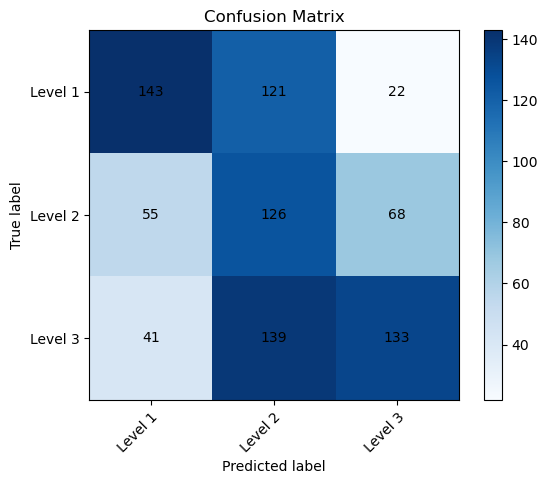

Feature Importance Rankings:
1. no_of_variables: 18.537587733083434
2. large_words_cat: 12.41831858125288
3. no_of_equations: 12.349463179499082
4. words_per_sentence_cat: 9.499258196737236
5. word_count_cat: 9.417355352657799
6. average_word_length_cat: 7.8702504996631975
7. type: 6.233433443070133
8. has_symbol: 4.721643594017559
9. has_pow: 4.038084464363203
10. has_fraction: 3.290380073670095
11. sentence_count_cat: 3.0843965772715833
12. has_digits: 2.7378270771159605
13. has_neq: 1.8694212325070454
14. has_eq: 1.7969435406816165
15. has_mod: 1.1060256649836255
16. has_logarithm: 1.0226839318135916
17. has_exp: 0.0069268576119523835


In [6]:
scores = rf_model(data1, scores=scores, experiment="Experiment1+SMOTE", club_target=True)

In [ ]:
scores

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.49233648361895055
train_evaluation:

              precision    recall  f1-score   support

           1       0.80      0.63      0.70      1217
           2       0.55      0.80      0.65      1048
           3       0.78      0.62      0.69      1123

    accuracy                           0.68      3388
   macro avg       0.71      0.68      0.68      3388
weighted avg       0.72      0.68      0.68      3388

[[761 357  99]
 [112 842  94]
 [ 82 341 700]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.62      0.52      0.56       287
           2       0.38      0.54      0.44       271
           3       0.60      0.46      0.52       290

    accuracy                           0.50       848
   macro avg       0.53      0.50      0.51       848
we

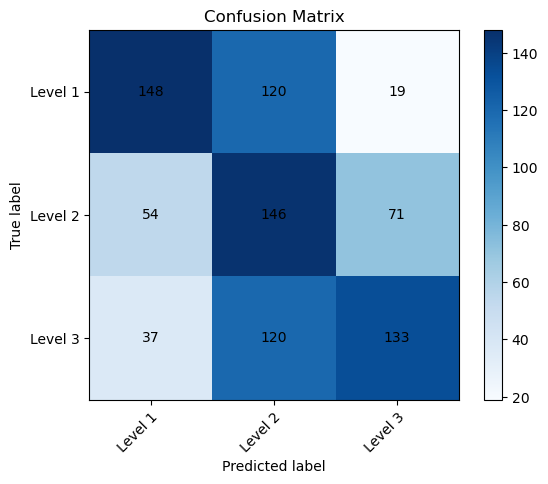

Feature Importance Rankings:
1. no_of_variables: 16.939577932398034
2. large_words_cat: 13.264933371363682
3. no_of_equations: 12.35281751792289
4. word_count_cat: 9.902227492486013
5. words_per_sentence_cat: 9.013216259171005
6. average_word_length_cat: 7.074675482419203
7. type: 6.45487023577353
8. has_symbol: 4.754587147344328
9. has_pow: 3.9870508607926576
10. sentence_count_cat: 3.4564020161835964
11. has_fraction: 3.3329296830094584
12. has_digits: 2.7608932216342503
13. has_neq: 2.3722787455186483
14. has_eq: 1.9452839287431123
15. has_mod: 1.5042320452924576
16. has_logarithm: 0.8605246196172412
17. has_exp: 0.0234994403299101


In [7]:
scores = rf_model(data1, use_smote_technique=0, scores=scores, experiment="Experiment1", club_target=True)

## Experiment 2: 

Consider the following features

1. Categorised linguistic features
2. All numerical math features

Run Random forest with default 5 class classification and report the results

In [8]:
data2 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.570995670995671
train_evaluation:

              precision    recall  f1-score   support

           1       0.83      0.71      0.76      1812
           2       0.54      0.75      0.63      1108
           3       0.77      0.70      0.74      1700

    accuracy                           0.71      4620
   macro avg       0.71      0.72      0.71      4620
weighted avg       0.74      0.71      0.72      4620

[[1279  336  197]
 [ 129  829  150]
 [ 132  375 1193]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.52      0.56       280
           2       0.33      0.51      0.40       252
           3       0.63      0.44      0.52      

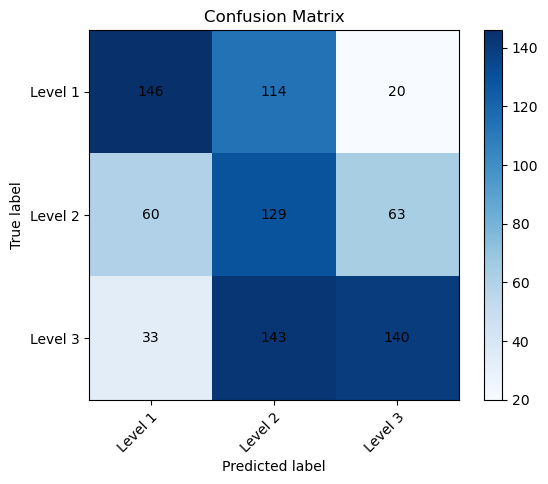

Feature Importance Rankings:
1. no_of_variables: 11.869823686743281
2. large_words_cat: 10.716102552627998
3. word_count_cat: 8.339561847287968
4. no_of_equations: 7.841744866794678
5. max_degree_of_equations: 7.706318654423164
6. words_per_sentence_cat: 7.384205945560633
7. symbol_count: 7.373909554364644
8. number_of_digits: 7.269449431916293
9. average_word_length_cat: 6.015914952827826
10. number_of_numbers: 5.986908778234763
11. no_of_pow: 5.774338309853958
12. type: 4.398534806196111
13. fracs_count: 3.103038951803956
14. sentence_count_cat: 2.4357456846622525
15. neqlts_count: 1.1921216569621025
16. eqlts_count: 1.1497975447787032
17. mod_count: 0.9318527980311603
18. log_count: 0.5098455792234476
19. no_of_exps: 0.0007843977070749916


In [9]:
scores = rf_model(data2, scores=scores, experiment="Experiment2+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.48997180864738155
train_evaluation:

              precision    recall  f1-score   support

           1       0.79      0.64      0.71      1188
           2       0.57      0.81      0.67      1087
           3       0.78      0.63      0.70      1113

    accuracy                           0.69      3388
   macro avg       0.72      0.69      0.69      3388
weighted avg       0.72      0.69      0.69      3388

[[758 338  92]
 [102 884 101]
 [ 95 318 700]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.53      0.57       276
           2       0.38      0.55      0.45       264
           3       0.63      0.45      0.53       308

    accuracy                           0.51       848
   macro avg       0.54      0.51      0.51      

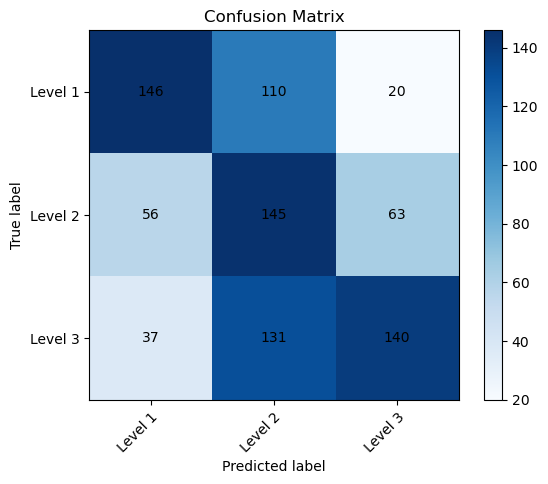

Feature Importance Rankings:
1. large_words_cat: 12.434072628641436
2. no_of_variables: 11.189563883036103
3. word_count_cat: 9.599288018178415
4. no_of_equations: 8.719237328311303
5. words_per_sentence_cat: 6.854996617243031
6. symbol_count: 6.712406914366978
7. number_of_digits: 6.506157196755587
8. max_degree_of_equations: 6.11017670857882
9. average_word_length_cat: 5.517888717534976
10. number_of_numbers: 5.343791277239831
11. no_of_pow: 5.311248128664625
12. type: 4.185824499885234
13. fracs_count: 3.9139005437015086
14. sentence_count_cat: 2.762733812948076
15. eqlts_count: 1.651935215397384
16. neqlts_count: 1.4622230135318155
17. mod_count: 1.236842046695158
18. log_count: 0.4845383627575809
19. no_of_exps: 0.0031750865321371305


In [11]:
scores = rf_model(data2, use_smote_technique=0, scores=scores, experiment="Experiment2", club_target=True)

## Experiment 3: 

Consider the following features

1. Categorised linguistic features
2. Categorical math features
3. POS features
4. no_of_equations
5. no_of_variables

Run Random Forest on the default 5 class classification and report the results



In [12]:
data3 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_CAT_FEATURES + POS_FEATURES + MANDATORY_FEATURES + TARGET_FEATURE]

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5932900432900432
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.75      0.80      1767
           2       0.64      0.78      0.70      1261
           3       0.81      0.78      0.79      1592

    accuracy                           0.77      4620
   macro avg       0.77      0.77      0.76      4620
weighted avg       0.78      0.77      0.77      4620

[[1318  286  163]
 [ 141  984  136]
 [  81  270 1241]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.51      0.56       287
           2       0.39      0.56      0.46       267
           3       0.62      0.47      0.54     

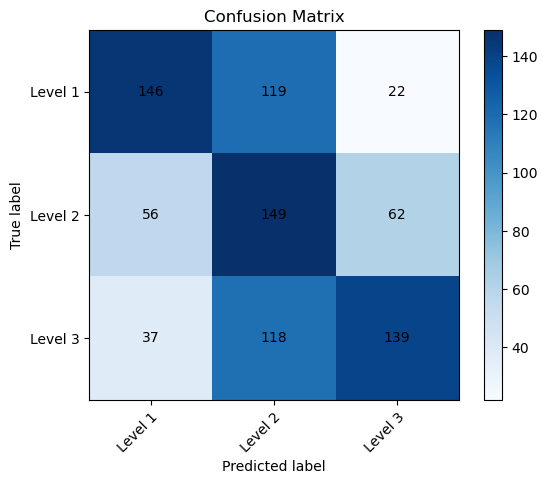

Feature Importance Rankings:
1. no_of_variables: 10.100235473176298
2. ADJ: 7.7478791289682745
3. NOUN: 6.712002818151038
4. no_of_equations: 6.064159675683461
5. VERB: 6.047922599766887
6. PUNCT: 5.38220925000742
7. ADP: 4.836726251734988
8. large_words_cat: 4.747777340132133
9. DET: 4.430361176056912
10. word_count_cat: 3.8321017592198183
11. has_pow: 3.2464299282072666
12. AUX: 3.2039908077119046
13. words_per_sentence_cat: 3.127230398083717
14. has_symbol: 2.9968817382180624
15. PRON: 2.8425116257269543
16. average_word_length_cat: 2.771486224657556
17. NUM: 2.596140540604067
18. type: 2.441197428483847
19. SCONJ: 2.283794260311884
20. PROPN: 2.261035871179032
21. CCONJ: 1.9540633051505263
22. ADV: 1.9215196615287047
23. has_digits: 1.7603026465897273
24. has_fraction: 1.6716099632965862
25. has_eq: 0.8397240632226624
26. PART: 0.7622666455270466
27. has_neq: 0.7380248584218684
28. X: 0.7330690670585639
29. sentence_count_cat: 0.7312282489621408
30. SYM: 0.5674330093816976
31. has_

In [13]:
scores = rf_model(data3, scores=scores, experiment="Experiment3+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5162355176185061
train_evaluation:

              precision    recall  f1-score   support

           1       0.84      0.69      0.75      1167
           2       0.66      0.84      0.74      1219
           3       0.82      0.73      0.77      1002

    accuracy                           0.75      3388
   macro avg       0.77      0.75      0.75      3388
weighted avg       0.77      0.75      0.75      3388

[[ 800  290   77]
 [ 113 1018   88]
 [  42  232  728]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.59      0.51      0.55       277
           2       0.39      0.49      0.43       302
           3       0.57      0.47      0.51       269

    accuracy                           0.49       848
   macro avg       0.51      0.49      0.

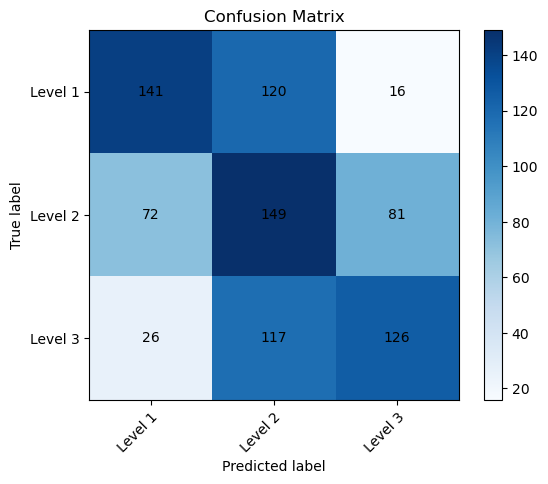

Feature Importance Rankings:
1. no_of_variables: 10.662838927505934
2. ADJ: 8.035841029079378
3. large_words_cat: 6.271227732837477
4. NOUN: 6.1804152492353595
5. no_of_equations: 5.86602010730532
6. VERB: 5.424298879361867
7. PUNCT: 5.2479854874378615
8. ADP: 4.7940652102594585
9. DET: 4.628310701343857
10. word_count_cat: 3.6284617820325846
11. PRON: 3.247063831522537
12. AUX: 2.852341021384597
13. words_per_sentence_cat: 2.851203543148526
14. NUM: 2.6496715394675414
15. average_word_length_cat: 2.5098265635254156
16. ADV: 2.5042681476293858
17. type: 2.495370285839207
18. has_pow: 2.4732907780174633
19. SCONJ: 2.4712129755126195
20. CCONJ: 2.457490087728285
21. has_symbol: 2.3465424641600614
22. PROPN: 2.2197276363430145
23. has_fraction: 1.5810709339200706
24. has_digits: 1.1676246567815296
25. PART: 0.8954633110228358
26. has_neq: 0.8905730016057876
27. has_eq: 0.7957682743872765
28. sentence_count_cat: 0.7254754926234703
29. X: 0.7026999414252847
30. SYM: 0.6125951347164933
31. h

In [14]:
scores = rf_model(data3, use_smote_technique=0, scores=scores, experiment="Experiment3", club_target=True)

## Experiment 4: 

Consider the following features

1. Categorised linguistic features
2. Numerical math features
3. POS features

Run Random Forest on the default 5 class classification and report the results



In [15]:
data4 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + TARGET_FEATURE]

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5848484848484848
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.74      0.79      1798
           2       0.64      0.81      0.72      1216
           3       0.82      0.79      0.80      1606

    accuracy                           0.77      4620
   macro avg       0.77      0.78      0.77      4620
weighted avg       0.79      0.77      0.78      4620

[[1325  302  171]
 [ 122  990  104]
 [  93  248 1265]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.50      0.55       292
           2       0.33      0.52      0.40       247
           3       0.60      0.43      0.50     

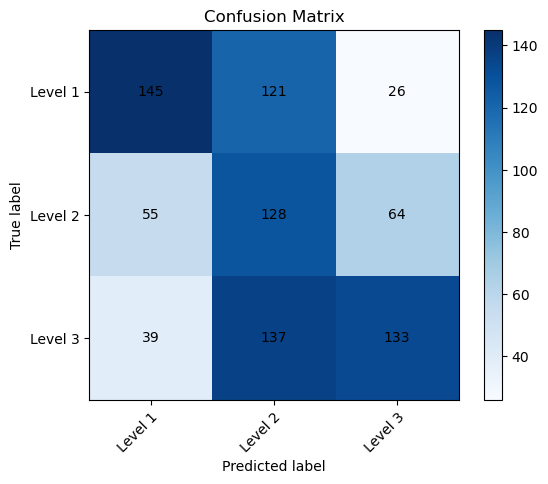

Feature Importance Rankings:
1. ADJ: 8.549093162294024
2. VERB: 6.2823406211182915
3. symbol_count: 6.158353483584289
4. max_degree_of_equations: 5.970317718960736
5. NOUN: 5.95740305678375
6. PUNCT: 5.678530448645146
7. large_words_cat: 5.262769915215869
8. number_of_digits: 4.958315328246126
9. DET: 4.627647784996258
10. no_of_pow: 4.37275598306974
11. ADP: 4.045826786137551
12. number_of_numbers: 3.8586967593774646
13. word_count_cat: 3.079320205770644
14. AUX: 3.0758380192244346
15. PRON: 3.036953988339095
16. words_per_sentence_cat: 2.9017186721388044
17. NUM: 2.7069058428853583
18. average_word_length_cat: 2.4668724611333404
19. SCONJ: 2.4650767648728342
20. fracs_count: 2.3578997123695453
21. CCONJ: 2.2742663411632464
22. PROPN: 2.1639954840151496
23. ADV: 1.855203000521698
24. eqlts_count: 1.0433172978225909
25. PART: 0.9668442432948345
26. neqlts_count: 0.9405596914681281
27. X: 0.8349155849196158
28. sentence_count_cat: 0.7789004205146817
29. SYM: 0.5107202574455447
30. mod_c

In [16]:
scores = rf_model(data4, scores=scores, experiment="Experiment4+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5053206276170682
train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.66      0.73      1184
           2       0.64      0.84      0.73      1186
           3       0.81      0.71      0.75      1018

    accuracy                           0.74      3388
   macro avg       0.76      0.74      0.74      3388
weighted avg       0.76      0.74      0.74      3388

[[785 314  85]
 [106 993  87]
 [ 64 233 721]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.49      0.54       297
           2       0.39      0.54      0.45       281
           3       0.55      0.46      0.50       270

    accuracy                           0.49       848
   macro avg       0.52      0.49      0.50       848
weight

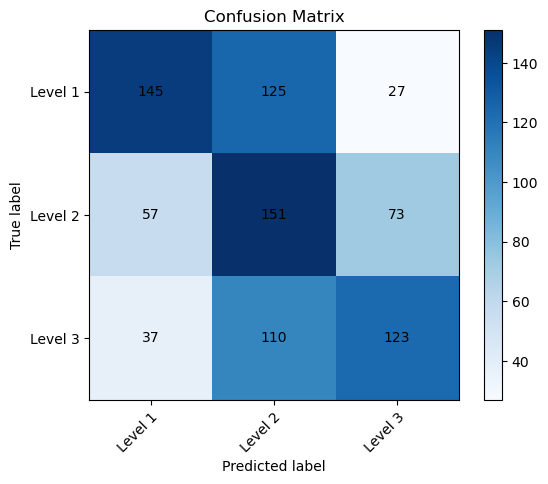

Feature Importance Rankings:
1. ADJ: 9.451870953653437
2. max_degree_of_equations: 7.397344199708369
3. large_words_cat: 6.098711431036923
4. VERB: 5.7598062390661955
5. NOUN: 5.260742246993247
6. PUNCT: 4.750231370613374
7. DET: 4.588571681320263
8. symbol_count: 4.489024766587989
9. number_of_digits: 4.4410280206960495
10. ADP: 4.335230359177926
11. no_of_pow: 4.314386998452486
12. word_count_cat: 4.088208994808828
13. number_of_numbers: 3.9480412515239887
14. AUX: 3.040278996077693
15. NUM: 3.0053725165906386
16. PRON: 2.722367346045136
17. SCONJ: 2.569672090322302
18. CCONJ: 2.5094756954332516
19. words_per_sentence_cat: 2.4062250232362605
20. fracs_count: 2.3207886368398856
21. average_word_length_cat: 2.262019391427405
22. ADV: 2.055663055870176
23. PROPN: 1.8154250604142896
24. neqlts_count: 1.152484892185558
25. PART: 1.074766914939472
26. X: 1.055558352243604
27. eqlts_count: 1.0010290251182994
28. mod_count: 0.6269311642966068
29. SYM: 0.5750868294251626
30. sentence_count_ca

In [17]:
scores = rf_model(data4, use_smote_technique=0, scores=scores, experiment="Experiment4", club_target=True)

## Experiment 5

Consider the following features

1. Categorised linguistic features
2. Numerical Math features
3. POS features
4. Math vocab

In [18]:
data5 = math_problems[LINGUISTIC_CAT_FEATURES + MATH_NUM_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES + TARGET_FEATURE]

Class distribution before SMOTE: Counter({2: 1540, 1: 955, 3: 893})
Class distribution after SMOTE: Counter({2: 1540, 1: 1540, 3: 1540})
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5844155844155844
train_evaluation:

              precision    recall  f1-score   support

           1       0.86      0.74      0.80      1791
           2       0.64      0.83      0.72      1179
           3       0.83      0.78      0.80      1650

    accuracy                           0.78      4620
   macro avg       0.78      0.78      0.77      4620
weighted avg       0.79      0.78      0.78      4620

[[1332  296  163]
 [ 103  979   97]
 [ 105  265 1280]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.61      0.51      0.55       285
           2       0.34      0.52      0.41       253
           3       0.61      0.44      0.51       3

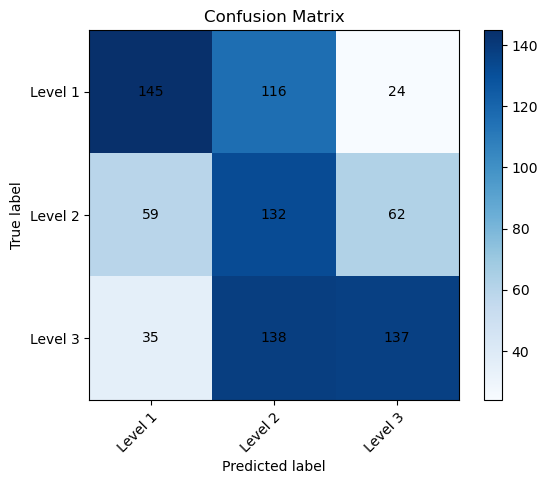

Feature Importance Rankings:
1. ADJ: 6.4183086545143775
2. max_degree_of_equations: 6.029383545325063
3. symbol_count: 5.855992271670029
4. NOUN: 5.787442836173808
5. number_of_math_vocab: 5.595354582802738
6. large_words_cat: 5.4512974559313285
7. VERB: 5.223088673734585
8. number_of_digits: 4.923175450343659
9. PUNCT: 4.7847021127596046
10. no_of_pow: 4.350114034892045
11. DET: 4.309575356441664
12. ADP: 3.7718185688361134
13. word_count_cat: 3.5484106158257207
14. number_of_numbers: 3.4871004236871888
15. average_word_length_cat: 3.396597133503207
16. PRON: 2.9349482180962623
17. words_per_sentence_cat: 2.7292469323355393
18. SCONJ: 2.556357185958057
19. AUX: 2.465026705469298
20. CCONJ: 2.3302328790789955
21. fracs_count: 2.2723560385516794
22. NUM: 2.248152491442062
23. PROPN: 2.055481403535917
24. ADV: 1.808002756594546
25. eqlts_count: 1.0570786919260657
26. PART: 0.8677919997872907
27. neqlts_count: 0.8448137803378263
28. X: 0.811681823698592
29. sentence_count_cat: 0.654650650

In [19]:
scores = rf_model(data5, scores=scores, experiment="Experiment5+SMOTE", club_target=True)

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.5070866176041272
train_evaluation:

              precision    recall  f1-score   support

           1       0.85      0.68      0.76      1189
           2       0.65      0.85      0.74      1189
           3       0.83      0.73      0.78      1010

    accuracy                           0.75      3388
   macro avg       0.78      0.75      0.76      3388
weighted avg       0.77      0.75      0.76      3388

[[ 810  311   68]
 [  98 1006   85]
 [  47  223  740]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.63      0.52      0.57       289
           2       0.40      0.54      0.46       285
           3       0.53      0.43      0.48       274

    accuracy                           0.50       848
   macro avg       0.52      0.50     

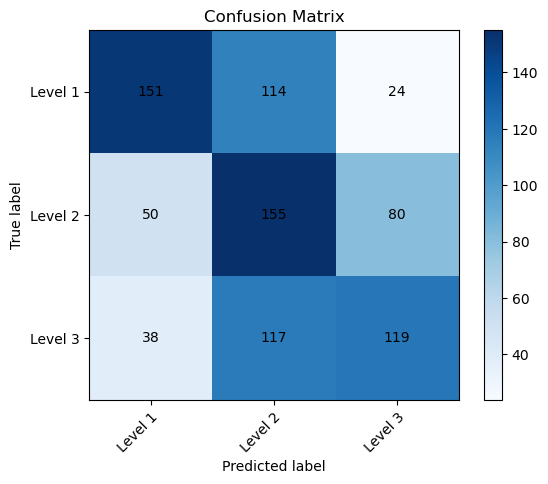

Feature Importance Rankings:
1. ADJ: 6.657970754757966
2. max_degree_of_equations: 6.094773502284303
3. symbol_count: 5.773978174620161
4. NOUN: 5.4307019739050295
5. large_words_cat: 5.412407565995072
6. PUNCT: 4.968570150893737
7. number_of_math_vocab: 4.834108840347125
8. VERB: 4.809852502947576
9. number_of_digits: 4.5359134153764105
10. DET: 4.348897263625764
11. no_of_pow: 4.273436982643662
12. ADP: 4.123521496562845
13. word_count_cat: 3.8361515789233502
14. number_of_numbers: 3.681266753495364
15. words_per_sentence_cat: 3.0529991371552647
16. AUX: 2.936952316057488
17. NUM: 2.786484422481405
18. PRON: 2.6419589255379674
19. SCONJ: 2.539710051887491
20. average_word_length_cat: 2.430860378240915
21. PROPN: 2.401090041311984
22. fracs_count: 2.2987343383030914
23. CCONJ: 2.080937739151081
24. ADV: 2.0312228496457587
25. neqlts_count: 1.2650107243323234
26. eqlts_count: 0.9650303726432454
27. X: 0.8973965274366793
28. PART: 0.8452875246358925
29. sentence_count_cat: 0.68518341182

In [20]:
scores = rf_model(data5, use_smote_technique=0, scores=scores, experiment="Experiment5", club_target=True)

In [21]:
scores

,Model,F1_train,F1_test
0,Experiment1+SMOTE,0.679479,0.464682
1,Experiment1,0.676332,0.497264
2,Experiment2+SMOTE,0.708560,0.479251
3,Experiment2,0.689272,0.501551
4,Experiment3+SMOTE,0.764056,0.505591
5,Experiment3,0.750485,0.485882
6,Experiment4+SMOTE,0.772172,0.469499
7,Experiment4,0.736939,0.489804
8,Experiment5+SMOTE,0.774128,0.479225
9,Experiment5,0.753096,0.497430


In [22]:
scores.to_csv("../Results/GT_3Levels.csv", index=False)